In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Weight updates for the different learning rules

In [2]:
def delta_seq(patterns,targets,W,lr):
    n_error = 0
    for i in range(0,patterns.shape[1]):
        error = np.dot(patterns[:,i],W) - targets[i]
        if np.abs(error) > 1:
            n_error+=1
        delta = - lr * error * patterns[:,i]
        W += delta
    error_rate = n_error/200
    return W, error_rate

def step(x):
    if x>0:
        return 1
    else:
        return 0

def perceptron_seq(patterns,targets,W,lr):
    n_error = 0
    for i in range(0,patterns.shape[1]):
        y = step(np.dot(patterns[:,i],W))
        if y != (targets[i]+1)//2:
            n_error += 1
        delta = - lr * (y-((targets[i]+1)//2)) * patterns[:,i]
        W += delta
    error_rate = n_error/200
    return W, error_rate

def delta_batch(patterns,targets,W,lr):
    error = W @ patterns - targets
    error_rate = np.sum(np.array([1 if np.abs(e)>1 else 0 for e in error]))/len(error)
    delta = -lr * error @ patterns.T
    return W + delta, error_rate

#### Initialize and define stuff

In [3]:
np.random.seed(41)
def generate_data(n_points,mean_a,mean_b,sigma_a,sigma_b=0.5):
    # Create and plot dataset
    assert n_points%2 == 0
    data = np.ones((3,n_points))
    data[0:2,:n_points//2] = np.random.multivariate_normal(mean_a,[[sigma_a,0],[0,sigma_a]],n_points//2).T
    data[0:2,n_points//2:] = np.random.multivariate_normal(mean_b,[[sigma_b,0],[0,sigma_b]],n_points//2).T

    target=np.ones(n_points)
    target[n_points//2:]=-1

    # plt.scatter(data[0,:],data[1,:], c=target)

    p = np.random.permutation(target.shape[0])
    data = data[:,p]
    target = target[p]
    return data, target

data, target = generate_data(200,[1.5,1.5],[-1.5,-1.5],0.4)


In [4]:
def plot_boundary(ax,W,lr):
    t = np.linspace(-3,3)
    if len(W) == 3:
        ax.plot(t, -((W[0]*t+W[2])/W[1]), label='lr='+str(lr))
    elif len(W) == 2:
        ax.plot(t, -W[0]*t/W[1], label='lr='+str(lr))

In [5]:
def learn_delta_seq(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_delta_seq = np.zeros((trials,epochs))
        for i in range(trials):
            W_delta_seq = np.random.normal(0,1,3)
            for epoch in range(epochs):
                W_delta_seq, errors_delta_seq[i,epoch] = delta_seq(data,target,W_delta_seq,lr)   
        mean = np.mean(errors_delta_seq,axis=0)
        var = np.var(errors_delta_seq,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs),mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_delta_seq,lr)
    axes[0].set_title(f'Delta rule, sequential learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Delta rule, sequential learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_delta_batch(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_delta_batch = np.zeros((trials,epochs))
        for i in range(trials):
            W_delta_batch = np.random.normal(0,1,3)
            for epoch in range(epochs):
                W_delta_batch, errors_delta_batch[i,epoch] = delta_batch(data,target,W_delta_batch,lr)
        mean = np.mean(errors_delta_batch,axis=0)
        var = np.var(errors_delta_batch,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs), mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_delta_batch,lr)
    axes[0].set_title(f'Delta rule, batch learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Delta rule, batch learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_perceptron_seq(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_perceptron_seq = np.zeros((trials,epochs))
        for i in range(trials):
            W_perceptron_seq = np.random.normal(0,1,3)
            for epoch in range(epochs):
                W_perceptron_seq, errors_perceptron_seq[i,epoch] = perceptron_seq(data,target,W_perceptron_seq,lr)   
        mean = np.mean(errors_perceptron_seq,axis=0)
        var = np.var(errors_perceptron_seq,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs), mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_perceptron_seq,lr)
    axes[0].set_title(f'Perceptron rule, sequential learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Perceptron rule, sequential learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_everything(data,target,trials,epochs,save,path):
    # Create figures
    figs1,axes1 = plt.subplots(1,2,figsize=(15, 5))
    figs2,axes2 = plt.subplots(1,2,figsize=(15, 5))
    figs3,axes3 = plt.subplots(1,2,figsize=(15, 5))
    lrs = [1e-5,5e-5,1e-4,1e-3,5e-3,1e-2]

    learn_delta_seq(data,target,trials,epochs,lrs,figs1,axes1,save,path)
    learn_delta_batch(data,target,trials,epochs,lrs,figs2,axes2,save,path)
    learn_perceptron_seq(data,target,trials,epochs,lrs,figs3,axes3,save,path)

    if save:
        figs1.savefig(path+"delta_seq.png", dpi=300)
        figs2.savefig(path+"delta_batch.png", dpi=300)
        figs3.savefig(path+"perceptron.png", dpi=300)

#### 3.1.2 Part 1 and 2

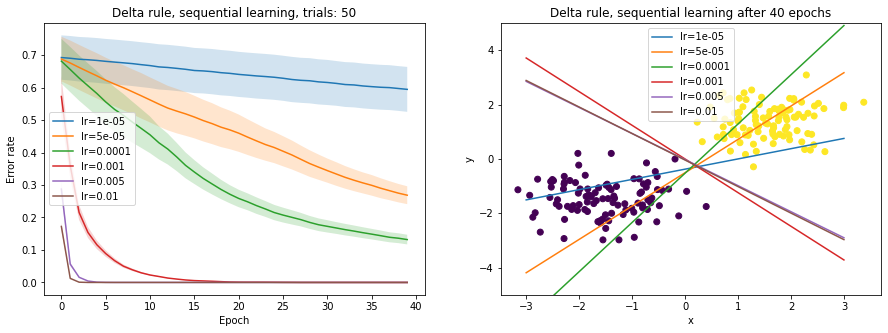

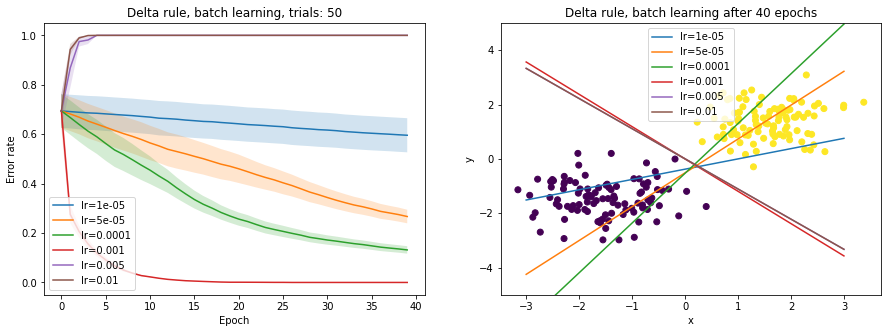

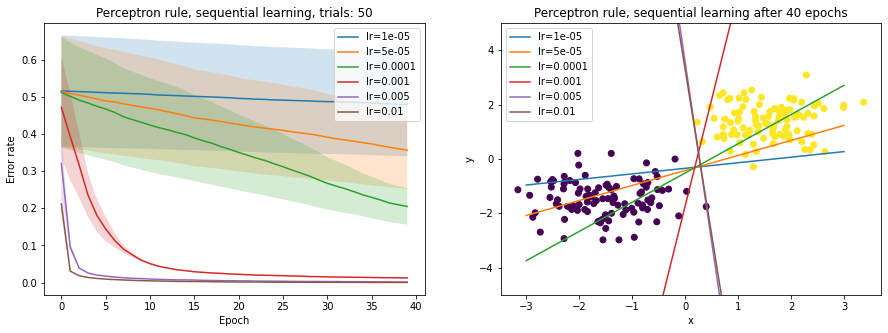

In [209]:
# Parameters
trials = 50
epochs = 40

# Compare all three learning strategies
learn_everything(data,target,trials, epochs,True,"lab1a/img/1/")

#### 3.1.2 Part 3

In [210]:
def learn_delta_seq(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_delta_seq = np.zeros((trials,epochs))
        for i in range(trials):
            W_delta_seq = np.random.normal(0,1,2)
            for epoch in range(epochs):
                W_delta_seq, errors_delta_seq[i,epoch] = delta_seq(data,target,W_delta_seq,lr)   
        mean = np.mean(errors_delta_seq,axis=0)
        var = np.var(errors_delta_seq,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs),mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_delta_seq,lr)
    axes[0].set_title(f'Delta rule, sequential learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Delta rule, sequential learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_delta_batch(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_delta_batch = np.zeros((trials,epochs))
        for i in range(trials):
            W_delta_batch = np.random.normal(0,1,2)
            for epoch in range(epochs):
                W_delta_batch, errors_delta_batch[i,epoch] = delta_batch(data,target,W_delta_batch,lr)
        mean = np.mean(errors_delta_batch,axis=0)
        var = np.var(errors_delta_batch,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs), mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_delta_batch,lr)
    axes[0].set_title(f'Delta rule, batch learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Delta rule, batch learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_perceptron_seq(data,target,trials,epochs,lrs,figs,axes,save,path):
    axes[1].scatter(data[0,:],data[1,:], c=target)
    # Learn and plot 
    for lr in lrs:
        np.random.seed(40)
        errors_perceptron_seq = np.zeros((trials,epochs))
        for i in range(trials):
            W_perceptron_seq = np.random.normal(0,1,2)
            for epoch in range(epochs):
                W_perceptron_seq, errors_perceptron_seq[i,epoch] = perceptron_seq(data,target,W_perceptron_seq,lr)   
        mean = np.mean(errors_perceptron_seq,axis=0)
        var = np.var(errors_perceptron_seq,axis=0)
        axes[0].plot(range(epochs),mean,label='lr='+str(lr))
        axes[0].fill_between(range(epochs), mean-var, mean+var, alpha=0.2)
        plot_boundary(axes[1],W_perceptron_seq,lr)
    axes[0].set_title(f'Perceptron rule, sequential learning, trials: {trials}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Error rate')
    axes[0].legend()
    axes[1].set_title(f'Perceptron rule, sequential learning after {epochs} epochs')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].set_ylim(-5,5)

def learn_everything(data,target,trials,epochs,save,path):
    # Create figures
    figs1,axes1 = plt.subplots(1,2,figsize=(15, 5))
    figs2,axes2 = plt.subplots(1,2,figsize=(15, 5))
    figs3,axes3 = plt.subplots(1,2,figsize=(15, 5))
    lrs = [1e-5,5e-5,1e-4,1e-3,5e-3,1e-2]

    learn_delta_seq(data,target,trials,epochs,lrs,figs1,axes1,save,path)
    learn_delta_batch(data,target,trials,epochs,lrs,figs2,axes2,save,path)
    learn_perceptron_seq(data,target,trials,epochs,lrs,figs3,axes3,save,path)

    if save:
        figs1.savefig(path+"delta_seq.png", dpi=300)
        figs2.savefig(path+"delta_batch.png", dpi=300)
        figs3.savefig(path+"perceptron.png", dpi=300)

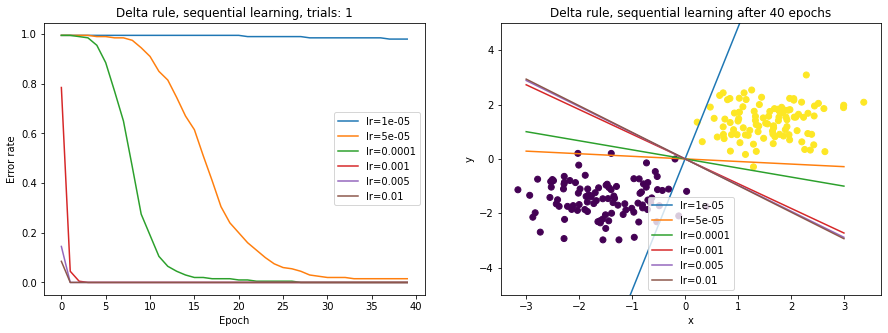

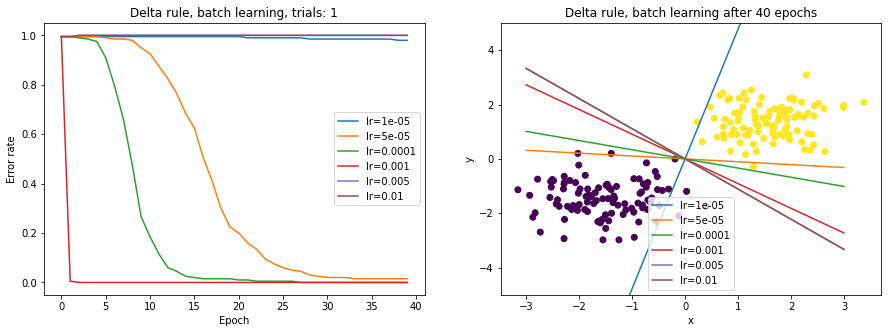

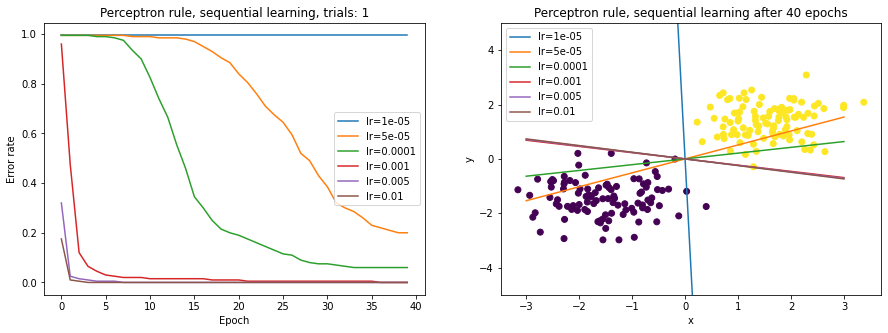

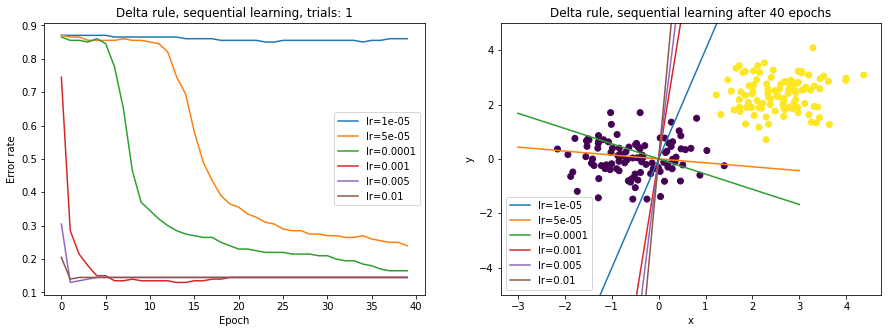

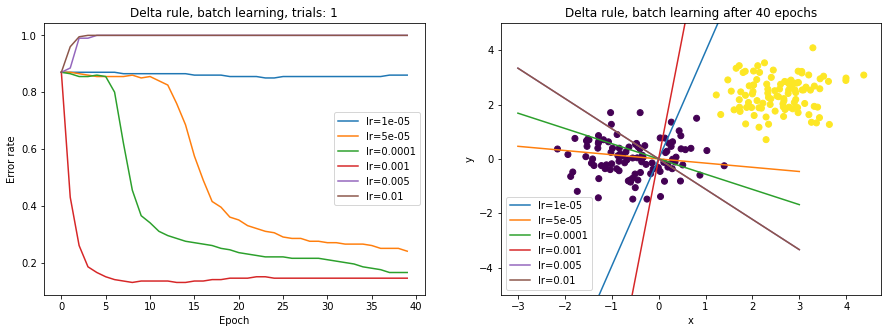

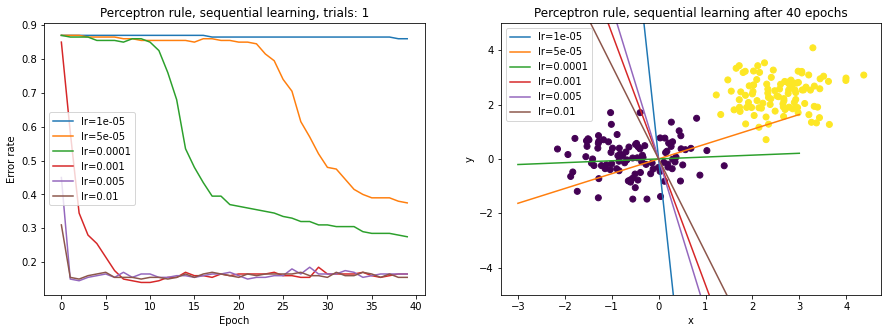

In [211]:
epochs = 40
trials = 1
# Remove bias
learn_everything(data[:2,:],target,trials,epochs,True,"lab1a/img/2/")

# Move data points s.t. not linearly separable through the origin
np.random.seed(41)
data, target = generate_data(200,[2.5,2.5],[-0.5,0],0.4)
learn_everything(data[:2,:],target,trials,epochs,True,"lab1a/img/3/")

#### 3.1.3 Part one

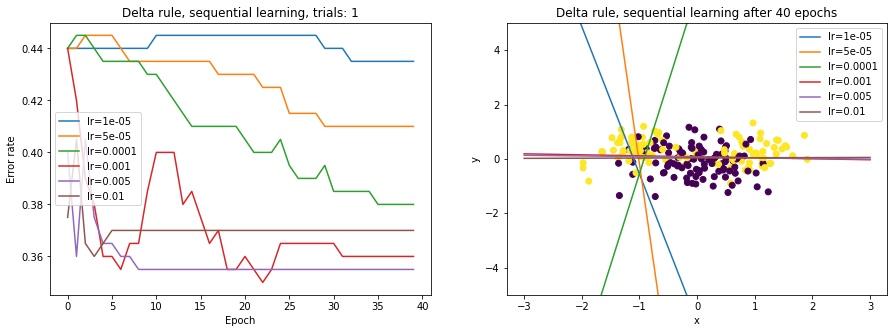

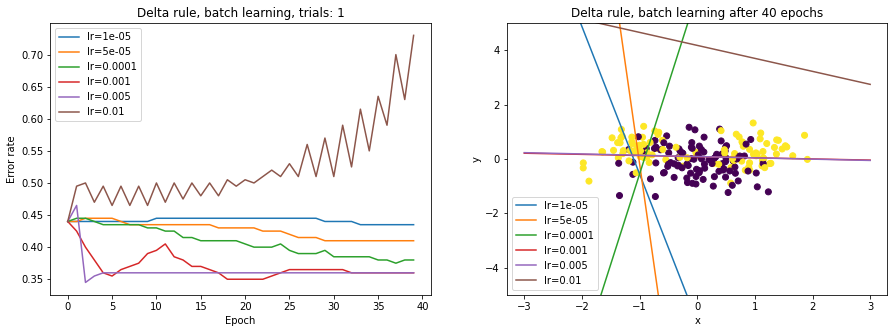

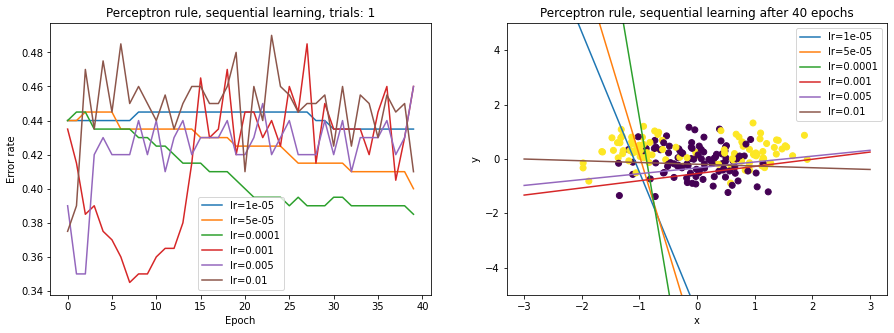

In [9]:
# Generate overlapping datasets
# data, target = generate_data(200,[0.5,1],[-1,-.5],0.5)
# W = np.random.normal(0,1,3)
# learn_everything(data[:2,:],target,W[:2],epochs,True,"lab1a/img/5_2/")
np.random.seed(94)
epochs = 40
trials = 1
# Create and plot dataset
data = np.ones((3,200))
data[0:2,:50] = np.random.multivariate_normal([-1.0,0.3],[[0.2,0],[0,0.2]],50).T
data[0:2,50:100] = np.random.multivariate_normal([1.0,0.3],[[0.2,0],[0,0.2]],50).T
data[0:2,100:] = np.random.multivariate_normal([0.0,-0.1],[[0.3,0],[0,0.3]],100).T

target=np.ones(200)
target[100:]=-1

p = np.random.permutation(target.shape[0])
data = data[:,p]
target = target[p]

# Move data points
# data, target = generate_data(200,[0.5,1],[-1,-.5],0.5)
learn_everything(data,target,trials,epochs,True,"img/5_2/")

#### 3.1.3 Part 2

In [6]:
def accuracy(W,data,target):

    transformed= W[:2] @data[:2,:]
    transformed[transformed<0]=-1
    transformed[transformed>=0]=1
    transformed_neg=transformed[target==-1]
    transformed_pos=transformed[target==1]
    target_pos=target[target==1]
    target_neg=target[target==-1]
    acc_pos=np.count_nonzero(transformed_pos==target_pos)/len(target_pos)
    acc_neg=np.count_nonzero(transformed_neg==target_neg)/len(target_neg)
    return acc_neg,acc_pos


In [7]:
def plot_boundary(ax,W,lr):
    t = np.linspace(-3,3)
    if len(W) == 3:
        ax.plot(t, -((W[0]*t+W[2])/W[1]), label=str(lr))
    elif len(W) == 2:
        ax.plot(t, -W[0]*t/W[1], label='lr='+str(lr))

In [8]:
def accuracy_delta(W,data,target):

    transformed= W @data
    transformed[transformed<W[2]]=-1
    transformed[transformed>=W[2]]=1
    transformed_neg=transformed[target==-1]
    transformed_pos=transformed[target==1]
    target_pos=target[target==1]
    target_neg=target[target==-1]
    acc_pos=np.count_nonzero(transformed_pos==target_pos)/len(target_pos)
    acc_neg=np.count_nonzero(transformed_neg==target_neg)/len(target_neg)
    return acc_neg,acc_pos

In [16]:
def generate_imbalanced(n,mu_a,mu_b,std_a,std_b,size_a,size_b,flag='42'):
    np.random.seed(95)
    data = np.ones((3,n))
    data[0:2,:n//4] = np.random.multivariate_normal([-mu_a[0],mu_a[1]],[[std_a,0],[0,std_a]],n//4).T
    data[0:2,n//4:n//2] = np.random.multivariate_normal(mu_a,[[std_a,0],[0,std_a]],n//4).T
    data[0:2,n//2:] = np.random.multivariate_normal(mu_b,[[std_b,0],[0,std_b]],n//2).T

    target=np.ones(n)
    target[n//2:]=-1

    # p = np.random.permutation(target.shape[0])
    # data = data[:,p]
    # target = target[p]

    negative=data[:,target==-1]
    positive=data[:,target==1]
    indeces_positive=np.random.choice(100,size_a,replace=False)
    indeces_negative=np.random.choice(100,size_b,replace=False)
    target=np.ones(150)
    if flag=='20-80':
        ind_small=np.where(positive[0,:]<0)[0]
        ind_big=np.where(positive[0,:]>0)[0]
        print(ind_small.shape)
        print(ind_big.shape)
        ind_new=np.hstack((np.random.choice(ind_small,40,replace=False),np.random.choice(ind_big,10,replace=False)))
        dataset=np.ones((3,150))
        dataset[:,:50]=positive[:,ind_new]
        dataset[:,50:]=negative
        target[50:]=-1
    else:
        size_set=size_a+size_b
        dataset = np.ones((3,size_set))
        dataset[:,:size_a]=positive[:,indeces_positive]
        dataset[:,size_a:]=negative[:,indeces_negative]
        target[size_a:]=-1
    p = np.random.permutation(150)
    dataset = dataset[:,p]
    target=target[p]
    return dataset,target

In [24]:
def accuracy(W,data,target):

    transformed= W@data
    transformed[transformed<0]=-1
    transformed[transformed>=0]=1
    transformed_neg=transformed[target==-1]
    transformed_pos=transformed[target==1]
    target_pos=target[target==1]
    target_neg=target[target==-1]
    acc_pos=np.count_nonzero(transformed_pos==target_pos)/len(target_pos)
    acc_neg=np.count_nonzero(transformed_neg==target_neg)/len(target_neg)
    return acc_pos, acc_neg

def plot_boundary_and_acc(data,target,W,epochs,save,path,title):
    # Create figures
    lr=0.001
    fig1,ax1 = plt.subplots()
    fig2,ax2 = plt.subplots()
    fig3,axes3 = plt.subplots(1,2,figsize=(15, 5))

    ax1.scatter(data[0,:],data[1,:], c=target)
    ax2.scatter(data[0,:],data[1,:], c=target)
    scatter = axes3[0].scatter(data[0,:],data[1,:], c=target)
    legend1 = axes3[0].legend(handles=[scatter.legend_elements()[0][1],scatter.legend_elements()[0][0]], labels=["Class A", "Class B"], loc="lower left")
    axes3[0].add_artist(legend1)
   
    W_perceptron_seq = W
    acc_perceptron = np.zeros(epochs)
    W_delta_batch = W
    acc_delta_batch = np.zeros(epochs)

    for epoch in range(epochs):

        W_perceptron_seq, acc_perceptron[epoch] = perceptron_seq(data,target,W_perceptron_seq,lr)
        W_delta_batch, acc_delta_batch[epoch] = delta_batch(data,target,W_delta_batch,lr)
    acc_pos_perceptron,acc_neg_perceptron=accuracy(W_perceptron_seq,data,target)
    acc_pos_delta,acc_neg_delta=accuracy(W_delta_batch,data,target)

    plot_boundary(ax1,W_perceptron_seq,lr)
    plot_boundary(axes3[0],W_perceptron_seq,"perceptron")
    plot_boundary(ax2,W_delta_batch,lr)
    plot_boundary(axes3[0],W_delta_batch,"delta")
    axes3[1].bar(['classA accuracy perceptron','classB accuracy perceptron','classA accuracy delta','class B accuracy delta'],(acc_pos_perceptron,acc_neg_perceptron,acc_pos_delta,acc_neg_delta))

    # Format plots
    ax1.set_title('Perceptron decision boundary:'+title)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim(-5,5)
    ax1.legend()
    ax2.set_title(f'Delta rule decision boundary:'+title)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.legend()
    ax2.set_ylim(-5,5)
    axes3[1].set_title('accuracy:'+title)
    axes3[1].set_ylabel('accuracy')
    axes3[1].set_ylabel('class accuracy for model')
    axes3[1].set_xticklabels(['classA accuracy perceptron','classB accuracy perceptron','classA accuracy delta','class B accuracy delta'],rotation=45, ha='right')
    axes3[1].legend()
    axes3[0].set_title(f'Decision boundaries:'+title)
    axes3[0].set_xlabel('x')
    axes3[0].set_ylabel('y')
    axes3[0].legend()
    axes3[0].set_xlim(-2.5,2.5)
    axes3[0].set_ylim(-2.5,2.5)
    # fig3.tight_layout()

    if save:
        fig1.savefig(path+'perceptron_decision_boundary'+title+'.png')
        fig2.savefig(path+"delta_decision_boundary"+title+".png")
        fig3.savefig(path+"decision_boundary"+title+".png", dpi=300)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
No handles with labels found to put in legend.


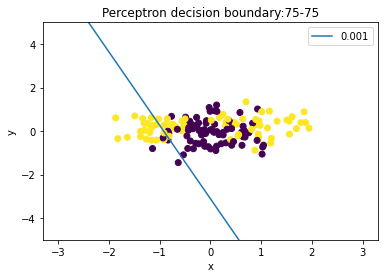

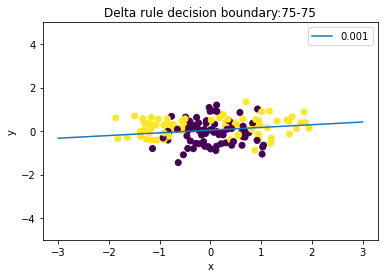

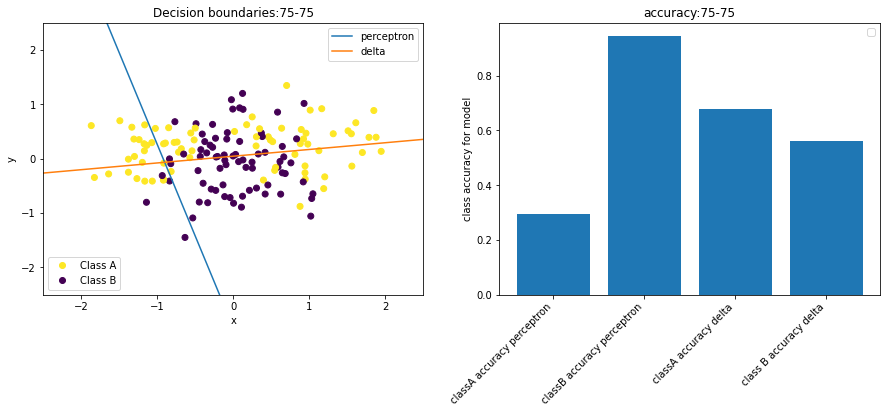

In [25]:
data, target = generate_imbalanced(200,[1,0.3],[0,-0.1],0.2,0.3,75,75)
W = np.random.normal(0,1,3)
plot_boundary_and_acc(data,target,W,30,True,"img/6_2/",title='75-75')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
No handles with labels found to put in legend.


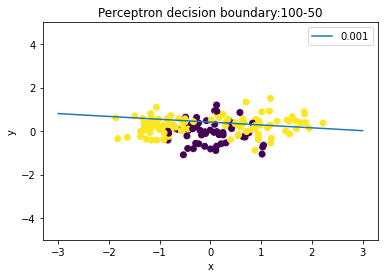

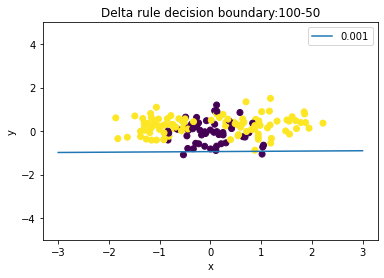

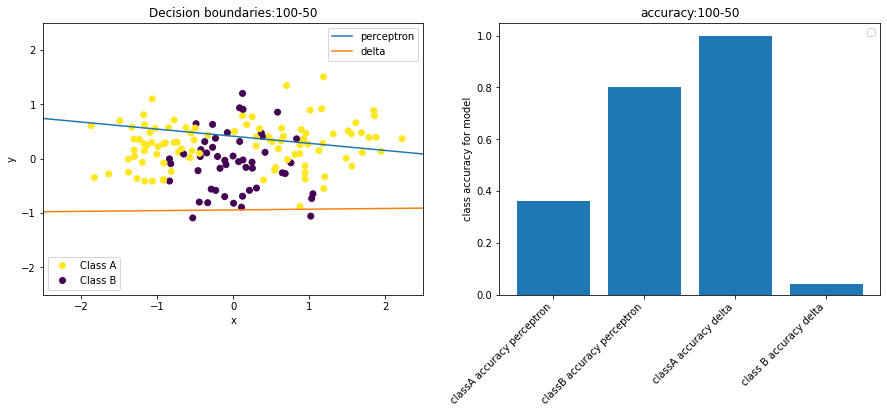

In [26]:
data, target = generate_imbalanced(200,[1,0.3],[0,-0.1],0.2,0.3,100,50)
W = np.random.normal(0,1,3)
plot_boundary_and_acc(data,target,W,30,True,"img/6_2/",title='100-50')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
No handles with labels found to put in legend.


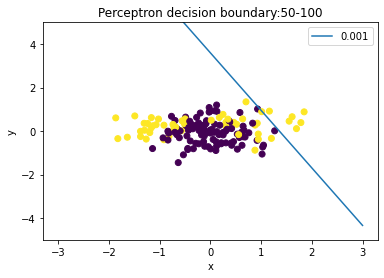

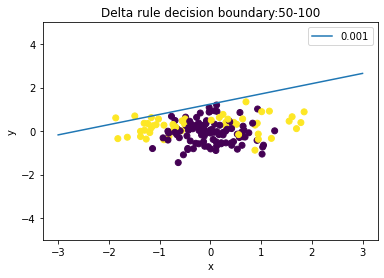

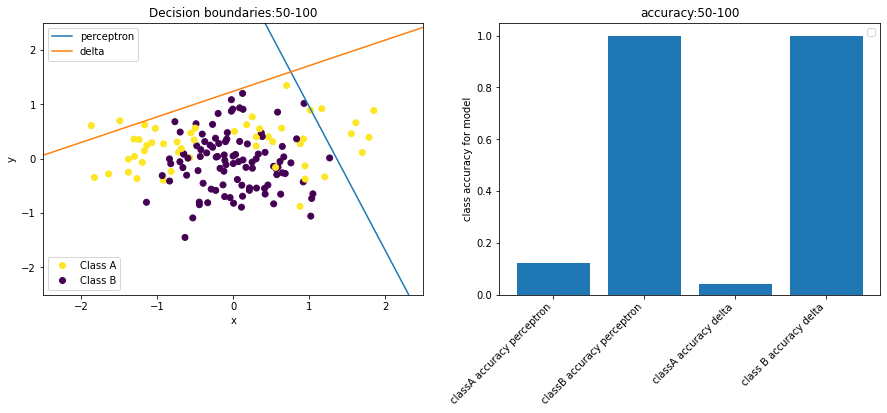

In [27]:
data, target = generate_imbalanced(200,[1,0.3],[0,-0.1],0.2,0.3,50,100)
W = np.random.normal(0,1,3)
plot_boundary_and_acc(data,target,W,30,True,"img/6_2/",title='50-100')

(48,)
(52,)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
No handles with labels found to put in legend.


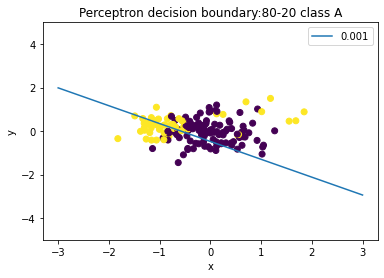

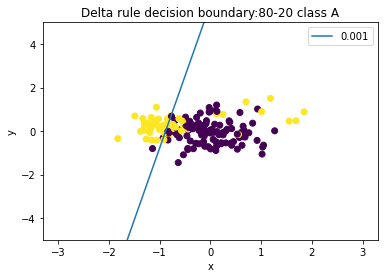

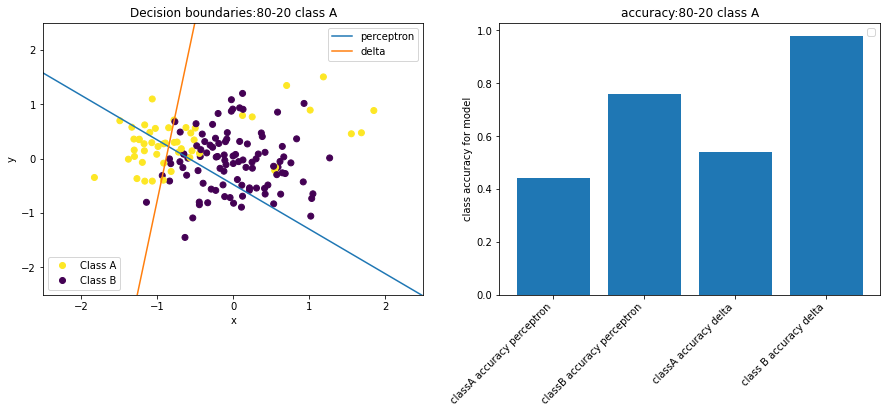

In [28]:
data, target = generate_imbalanced(200,[1,0.3],[0,-0.1],0.2,0.3,100,50,'20-80')
W = np.random.normal(0,1,3)
plot_boundary_and_acc(data,target,W,30,True,"img/6_2/",title='80-20 class A')